<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/03_02_%E3%83%87%E3%83%BC%E3%82%BF%E6%A7%8B%E9%80%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 表データ構造
csvになっているデータをpythonに取り込み簡単にデータを確認します

In [1]:
import pandas as pd # pandas 表データ処理では大変便利なモジュールです
import numpy as np
import urllib.request # webからデータを読みこむ際につかいます
import matplotlib.pyplot as plt #グラフの描画に使うモジュールです

## データの読み込み
webから直接データを読みこむこともできますが，ここではいったんgoogle colabのドライブに保存してから使います

In [2]:
url = "https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv" #kaggleのタイタニックの乗客データ
urllib.request.urlretrieve(url, 'titanic.csv') # titanicという名前で google colabのドライブに保存します

('titanic.csv', <http.client.HTTPMessage at 0x7f276b5d07d0>)

In [3]:
df = pd.read_csv('titanic.csv') # pandasのデータフレームに読みこみます

## データの中身を見たい場合には　変数を直接評価　あるいは　print文をつかいます

In [4]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print(df) #print文でも出力しますが，フォーマットがかわります

     survived  pclass  ... cabin embarked
0           0       3  ...   NaN        S
1           1       1  ...   C85        C
2           1       3  ...   NaN        S
3           1       1  ...  C123        S
4           0       3  ...   NaN        S
..        ...     ...  ...   ...      ...
886         0       2  ...   NaN        S
887         1       1  ...   B42        S
888         0       3  ...   NaN        S
889         1       1  ...  C148        C
890         0       3  ...   NaN        Q

[891 rows x 11 columns]


## どのような属性（カラム）があるかは df.columns でわかります

In [10]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

## 各カラムの変数の型を知りたいとときは　df.dtypesをみてみます
型は pandasがcsvを読みこむときに自動できまりますが，必ずしも思っているような型になっていないことがあります。その場合は後から型を変える必要があります

In [ ]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

## データの全体的な統計量を簡単に把握するには df.describe()を実行します
describeでわかることは数値データです。カテゴリカルなデータは計算から省かれます
describeでもかなりのことがわかりますが，より詳細な分析は04-04で扱うprofileをつかいます

In [12]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## info で，欠損値の数を調べられます

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## カテゴリカルデータでユニークな値のリストを調べたいときは，カラムを指定してunique 関数を呼びます
numpy のarray型で返ってきます

In [18]:
df["cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## 例えば　属性cabinのユニークなラベルの数を調べたいときは lenで評価します

In [20]:
len(df["cabin"].unique())

148

## 年齢のヒストグラムをつくってみます

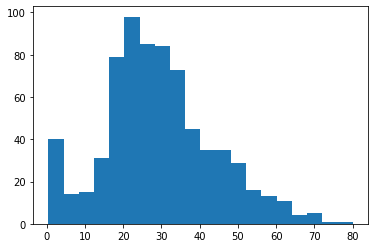

In [22]:
plt.hist(df["age"],bins=20) # binの数を20にしています　
plt.show()

ここでは　pandas や　numpy の詳しい使い方は扱いませんが，大変多くの機能があり大概のことはpandas とnumpyで済ませることができます。使いこなすとpandasだけでほとんどのことができるはずです。
